# Formal Methods - Case study on Process Mining with PN

---

**Prof**. De Carolis Berardina

**Student** Semeraro Daniele 776209 d.semeraro25@studenti.uniba.it

*Academic Year 2022-2023*

---


# Introduction and Context
In the increasingly complex environment of modern production chains, operational efficiency has become a key priority for companies. To achieve this, process analysis is essential. In this context, the use of formal methods offers a rigorous, evidence-based approach to understanding, modelling and optimising business processes.


## Introduction to Process Mining
The process analysis process, known as **process mining**, is based on the use of algorithms and data analysis techniques to extract detailed, objective and accurate information from business activity logs. By analysing the data generated by day-to-day activities, process mining makes it possible to identify patterns, deviations and opportunities for improvement in business processes.

There are three general types of process mining:
+    **Process Discovery**: is the process of extracting process models from raw event data. This event data is usually recorded by information systems during the execution of business processes, such as log files. The main objective is to discover, represent and analyse existing business processes in an objective manner, based on the actual data of the activities performed by the actors involved. The techniques used include mining algorithms, such as the alpha algorithm, the rule discovery algorithm, and the frequency-based discovery algorithm.

*    **Process Conformance**: this is the process of comparing existing process models with real business activity data to identify discrepancies, deviations or non-conformities between the planned process and the one actually executed. This type of process mining allows organisations to assess the effectiveness and efficiency of their processes, identifying any undesirable variations that may adversely affect performance or service quality. Techniques used include aligning the process model with actual data, analysing deviations and identifying root causes of non-conformities.

*    **Process Enhancement**: is the process of using information obtained through process mining to improve existing business processes. This type of process mining focuses on optimising processes, identifying areas for improvement and implementing corrective actions to increase efficiency, reduce costs or improve service quality. Techniques used include process simulation, modelling of improved processes and evaluating the impact of proposed changes through predictive or scenario analysis.


## Objectives of the Case Study
The objective of the case study is to analyse a set of logs of an assembly line of a company of different products. Then apply different process mining algorithms to obtain different process models to help understand real process.

## Dataset
To find a valid dataset, I consulted several sites offering open data from different companies and research organisations, such as 4.TU.ResearchData, Kaggle, DATA.GOV, GitHub.
The dataset I selected is available at the following link:

*https://data.4tu.nl/articles/_/12697997/1*

The dataset includes real information on products that have followed an assembly or processing line.

The dataset consists of 14 columns, described below:
*    Case ID
*    Activity
*    Resource
*    Start Timestamp
*    Complete Timestamp
*    Span
*    Work Order Qty
*    Part Desc.
*    Worker ID
*    Report Type
*    Qty Completed
*    Qty Rejected
*    Qty for MRB
*    Rework

and 4543 instances of which 221 are products with different activities.

# Implementation phase

In [ ]:
!pip install pm4py
!pip install graphviz
!pip install matplotlib

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.algo.analysis.woflan import algorithm as woflan

In [4]:
def loadDataset(path):
    return pd.read_csv(path)

## Analysis and modeling of data

### Load logs

In [5]:
data = loadDataset("/content/drive/MyDrive/Colab Notebooks/Production_Data.csv")

In [6]:
data.shape

(4543, 14)

The dimensions of the dataset are equal to 4543 rows and 17 columns which will be analysed.

In [7]:
data.head()

Case ID                       Activity                       Resource  \
0  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
1  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
2  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
3  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
4  Case 1         Turning & Milling Q.C.                Quality Check 1   

           Start Timestamp       Complete Timestamp    Span  Work Order  Qty  \
0  2012/01/29 23:24:00.000  2012/01/30 05:43:00.000  006:19               10   
1  2012/01/30 05:44:00.000  2012/01/30 06:42:00.000  000:58               10   
2  2012/01/30 06:59:00.000  2012/01/30 07:21:00.000  000:22               10   
3  2012/01/30 07:21:00.000  2012/01/30 10:58:00.000  003:37               10   
4  2012/01/31 13:20:00.000  2012/01/31 14:50:00.000  001:30               10   

   Part Desc. Worker ID Report Type  Qty Completed  Qty Rejected  Qty for MRB  \
0  Cable Head    ID4932           S              1             0            0   
1  Cable Head    ID4932           D              1             0            0   
2  Cable Head    ID4167           S              0             0            0   
3  Cable Head    ID4167           D              8             0            0   
4  Cable Head    ID4163           D              9             1            0   

  Rework  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [12]:
df = pd.DataFrame(data)

# Convert timestamp columns to datetime format
df['Start Timestamp'] = pd.to_datetime(df['Start Timestamp'])
df['Complete Timestamp'] = pd.to_datetime(df['Complete Timestamp'])

# Calculate the duration of each activity
df['Duration'] = df['Complete Timestamp'] - df['Start Timestamp']

# Group by activity type and average durations
avg_duration_per_activity = df.groupby('Activity')['Duration'].mean()

# Convert average durations to hours, minutes and seconds
avg_duration_per_activity_days = avg_duration_per_activity.dt.components['days']
avg_duration_per_activity_hours = avg_duration_per_activity.dt.components['hours']
avg_duration_per_activity_minutes = avg_duration_per_activity.dt.components['minutes']
avg_duration_per_activity_seconds = avg_duration_per_activity.dt.components['seconds']

# Display of the average durations in hours, minutes and seconds
avg_duration_per_activity_formatted = pd.DataFrame({
     'Days': avg_duration_per_activity_days,
     'Hours': avg_duration_per_activity_hours,
     'Minutes': avg_duration_per_activity_minutes,
     'Seconds': avg_duration_per_activity_seconds
})

print(avg_duration_per_activity_formatted)

                                         Days  Hours  Minutes  Seconds
Activity                                                              
Change Version - Machine 22                 0      8       11       45
Deburring - Manual                          0      2        9       53
Final Inspection - Weighting                0      1       15        0
Final Inspection Q.C.                       0      1       54       48
Fix - Machine 15                            0      1       19       30
Fix - Machine 15M                           0      1       36        0
Fix - Machine 19                            0      6       45        0
Fix - Machine 3                             0      1       17        0
Fix EDM                                     0      2       45       15
Flat Grinding - Machine 11                  0      1       33       29
Flat Grinding - Machine 26                  0      4       30        0
Grinding Rework                             0      1       38       49
Grindi

In [6]:
data['Start Timestamp'] = pd.to_datetime(data['Start Timestamp'])

In [7]:
dataframe = pm4py.format_dataframe(data, case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

#Exporting IEEE XES files
pm4py.write_xes(event_log, 'exported.xes')

exporting log, completed traces ::   0%|          | 0/225 [00:00<?, ?it/s]

### Distribution of activities agains different time **scales**

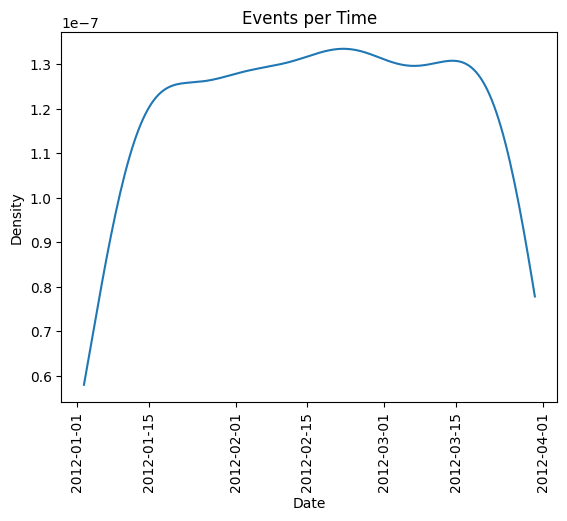

In [8]:
# Distribution of events over time
# It helps to understand in which time intervals the greatest number of events is recorded.
x, y = attributes_filter.get_kde_date_attribute(event_log, attribute="time:timestamp")

# Visualize it
gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

These graphs show the distribution of activities and events recorded by the the
entire data collection period, which took place between 01 January 2021 and 01 April 2012 for a total period of 3 months.

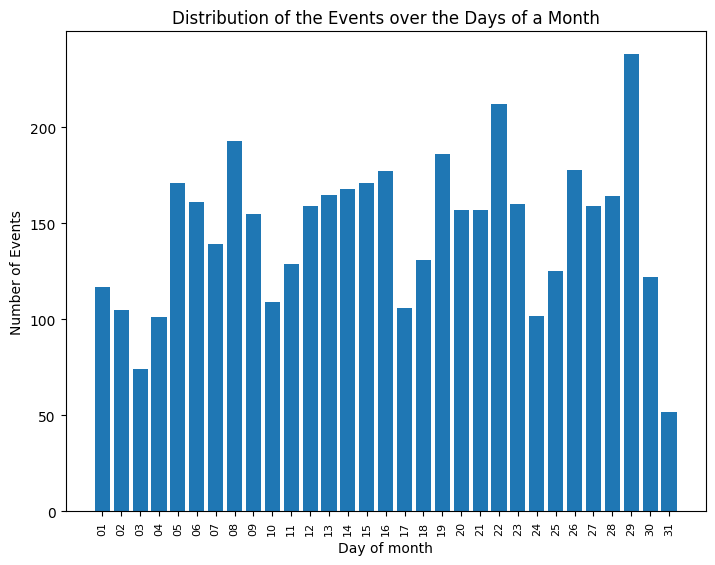

In [ ]:
# Distribution of activities agains different time scales
pm4py.view_events_distribution_graph(event_log, distr_type="days_month", format="png")

The figure shows the number of events that occur each day over the course of a month, with varying frequencies, reaching a notable peak on the 29th. The image is interesting as it displays distributions of daily events, allowing analysis of patterns or anomalies in occurrences of events over the course of a month.

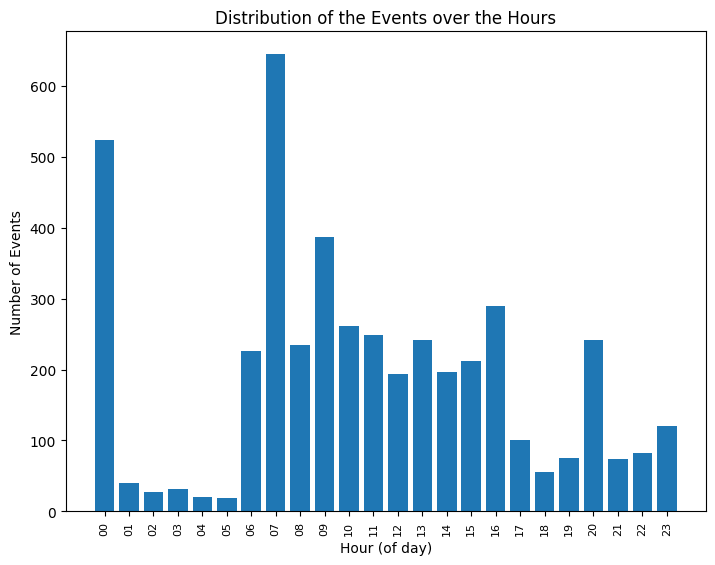

In [ ]:
pm4py.view_events_distribution_graph(event_log, distr_type="hours", format="png")

From this graph it can be seen that the workload is not involved in activities between 1 a.m. and 5 a.m.. Furthermore, the busiest period of the day is recorded between 5 p.m. and 23 p.m..

### Variants:

In [ ]:
vars = pm4py.get_variants(event_log)

print("Number of variants: ",len(vars), "\n")

for k, v in vars.items():
  print('{}'.format(' --> '.join(k)), " \n")

Number of variants:  221 

Turning & Milling - Machine 4 --> Turning & Milling - Machine 4 --> Turning & Milling - Machine 4 --> Turning & Milling - Machine 4 --> Turning & Milling Q.C. --> Laser Marking - Machine 7 --> Lapping - Machine 1 --> Lapping - Machine 1 --> Lapping - Machine 1 --> Lapping - Machine 1 --> Round Grinding - Machine 3 --> Round Grinding - Machine 3 --> Final Inspection Q.C. --> Final Inspection Q.C. --> Final Inspection Q.C. --> Packing  

Turning & Milling - Machine 9 --> Turning Q.C. --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning & Milling - Machine 9 --> Turning Q.C. --> Laser Marking - Machine

## Process Discovery

### Alpha Miner
*   Cannot handle loops of length one and length two
*   Invisible and duplicated tasks cannot be discovered
*   Discovered model might not be sound
*   Weak against noise


The output of the Alpha Miner is an Petri Net.

**Advantages**: creates simple models that agree with the quality criteria of Generalization and Simplicity

**Disadvantages**:
*   it lacks Precision and Fitness as a consequence of the quality criteria it possesses.
*   does not take into account event frequencies.


replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

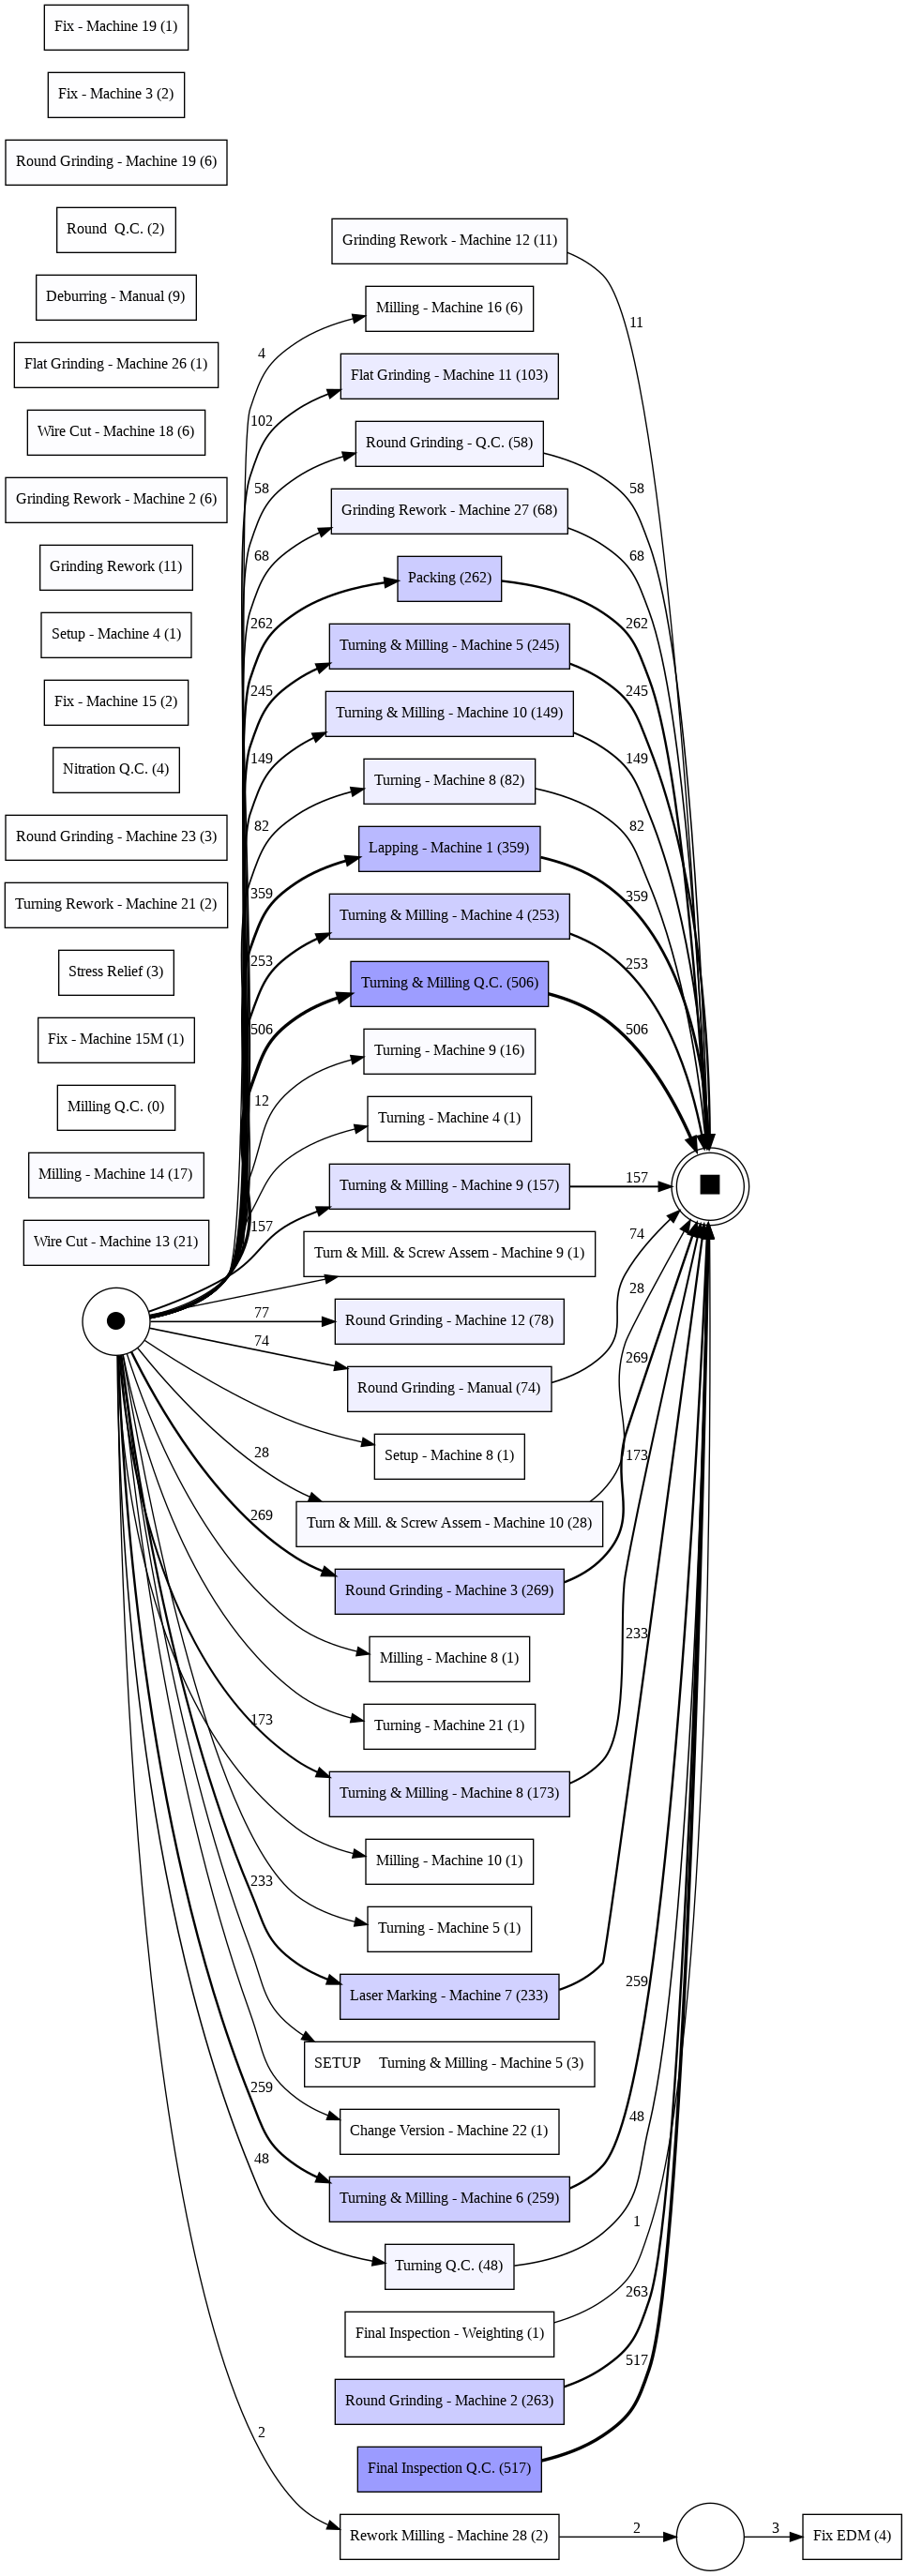

In [10]:
# Apply Alpha miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
# Import the Alpha miner algorithm
from pm4py.visualization.petri_net import visualizer as pn_visualizer

alpha_net, im_alpha, fm_alpha = alpha_miner.apply(event_log)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz = pn_visualizer.apply(alpha_net, im_alpha, fm_alpha, parameters=parameters, variant = pn_visualizer.Variants.FREQUENCY, log=event_log)
pn_visualizer.view(gviz)

In [ ]:
num_places = len(alpha_net.places)
num_transitions = len(alpha_net.transitions)

print("Number of places of the Alpha Net:", num_places)
print("Number of transition of the Alpha Net:", num_transitions)

Number of places of the Alpha Net: 3
Number of transition of the Alpha Net: 55


It is also possible to automatically verify that the obtained model is **soudness**.
A Petri Net is *sound* iff:
*   It is well formed.
*   it contains no live-locks.
*   it contains no deadlocks.
*   we are able to always reach the final marking

In [ ]:
# Check soundness
woflan.apply(alpha_net, im_alpha, fm_alpha)

Input is ok.
Petri Net is a not a worflow net.


False

* *Input is ok.*: This message indicates that the input provided to the algorithm, i.e. the Petri net and the start and end markings, are correct and valid for the analysis.

* *Petri Net is not a workflow net.*: This message indicates that the Petri Net is not a workflow net (a special class of Petri nets that respects certain properties, such as linearity and absence of output branches).

* *False*: Indicates that the Petri net may have problems such as deadlock, live-lock, or other error situations.

More analysis:
*  **Free Choice**: Indicates if any transition can occur regardless of the state of places --> Yes
*  **Conflict Free**: Shows if transitions compete for the same places --> No
*  **Output Nonbranching**: Indicates if once a transition occurs, there are no alternative choices for the next state --> No
*  **K* 1* Marking**: Shows if there's a specific marking state where one place has K tokens and others have 1 token each --> Yes
*  **Isolated Elements**: Reveals if there are transitions or places disconnected from the rest of the network --* > Yes
*  **Restricted Free Choice**: Similar to Free Choice but with additional restrictions --> Yes
*  **Nonpure Only Simple Side Conditions**: Indicates if transition conditions are simple --> No
*  **Pure**: Shows if all transitions have both pre*  and post* conditions --> Yes
*  **Strongly Connected**: Indicates if there's a path from every place to every other place and every transition to every other transition --> No
*  **Bounded**: Shows if there's an upper limit on tokens in places for all reachable markings --> No
*  **Simply Live**: Reveals if there's a path reaching every place and transition from a marked place --> Yes
*  **S Net**: Shows if there's only one entry and exit place for each transition --> Yes
*  **Homogeneous**: Indicates if all places and transitions have the same structure --> Yes
*  **Safe**: Shows if there's no path leading to an infinite number of tokens --> No
*  **Asymmetric Choice**: Indicates if some transitions can only be enabled in certain contexts --> Yes
*  **T Net**: Shows if there's only one entry point for each transition --> No
*  **Weakly Connected**: Reveals if there's at least one path from every place to every other place, but not necessarily between transitions --> No

In [ ]:
# Log-Model Evaluation
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

print("Fitness token based replay:", pm4py.fitness_token_based_replay(event_log, alpha_net, im_alpha, fm_alpha))
print("Fitness alignments:", pm4py.fitness_alignments(event_log, alpha_net, im_alpha, fm_alpha))
print("Precision token based replay:",pm4py.precision_token_based_replay(event_log, alpha_net, im_alpha, fm_alpha))
print("Precision alignments:",pm4py.precision_alignments(event_log, alpha_net, im_alpha, fm_alpha))
print("Generalization:", generalization_evaluator.apply(event_log, alpha_net, im_alpha, fm_alpha))

replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

Fitness token based replay: {'perc_fit_traces': 2.6666666666666665, 'average_trace_fitness': 0.22101489479963402, 'log_fitness': 0.11003952668946315, 'percentage_of_fitting_traces': 2.6666666666666665}


aligning log, completed variants ::   0%|          | 0/221 [00:00<?, ?it/s]

Fitness alignments: {'percFitTraces': 2.6666666666666665, 'averageFitness': 0.23326339163540666, 'percentage_of_fitting_traces': 2.6666666666666665, 'average_trace_fitness': 0.23326339163540666, 'log_fitness': 0.13338926174496646}


replaying log with TBR, completed traces ::   0%|          | 0/3572 [00:00<?, ?it/s]

Precision token based replay: 0.3978918888450482


computing precision with alignments, completed variants ::   0%|          | 0/3572 [00:00<?, ?it/s]

Precision alignments: 0.3978918888450482


replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

Generalization: 0.5820985500667445


The provided results describe conformity assessments between the event log and the Petri net through two different techniques: token-based replay and alignment. Furthermore, the accuracy of the models against the event log is also evaluated with the generalization.

1. **Fitness token based replay**:
    - `perc_fit_traces`: 2.67% of traces in the event log fit the Petri net.
    - `average_trace_fitness`: On average, traces fit 22.10% to the Petri net.
    - `log_fitness`: The overall degree of fit between the event log and the Petri net is 11%.
    - `percentage_of_fitting_traces`: This value also indicates that 2.67% of the traces in the event log fit the Petri net.

2. **Fitness alignments**:
    - `percFitTraces`: 2.67% of traces in the event log fit the Petri net.
    - `averageFitness`: On average, tracks fit 23.33% to the Petri net.
    - `percentage_of_fitting_traces`: 13.34% of traces in the event log fit the Petri net.
    - `average_trace_fitness`: This value also indicates that on average traces fit 2.67% to the Petri net.
    - `log_fitness`: The overall degree of fit between the event log and the Petri net is 78.9%.

3. **Precision token based replay**:
    - The accuracy of the model compared to the event log, calculated using token-based replay, is 39.79%.

4. **Precision alignments**:
    - The accuracy of the model with respect to the event log, calculated using alignment, is 39.79%.

5. **Generalization**:
    - The generalization of the model with respect to the event log is 58.20%.


### Heuristic Miner
*   Takes frequency into account
*   Detects short loops
*   Does not guarantee a sound model

**Advantages**:
*   applies filtering to reduce noise
*   detects short loops

**Disadvantages**: it lacks Precision and Fitness as a consequence of the quality criteria it possesses

Heuristic Miner for the process model

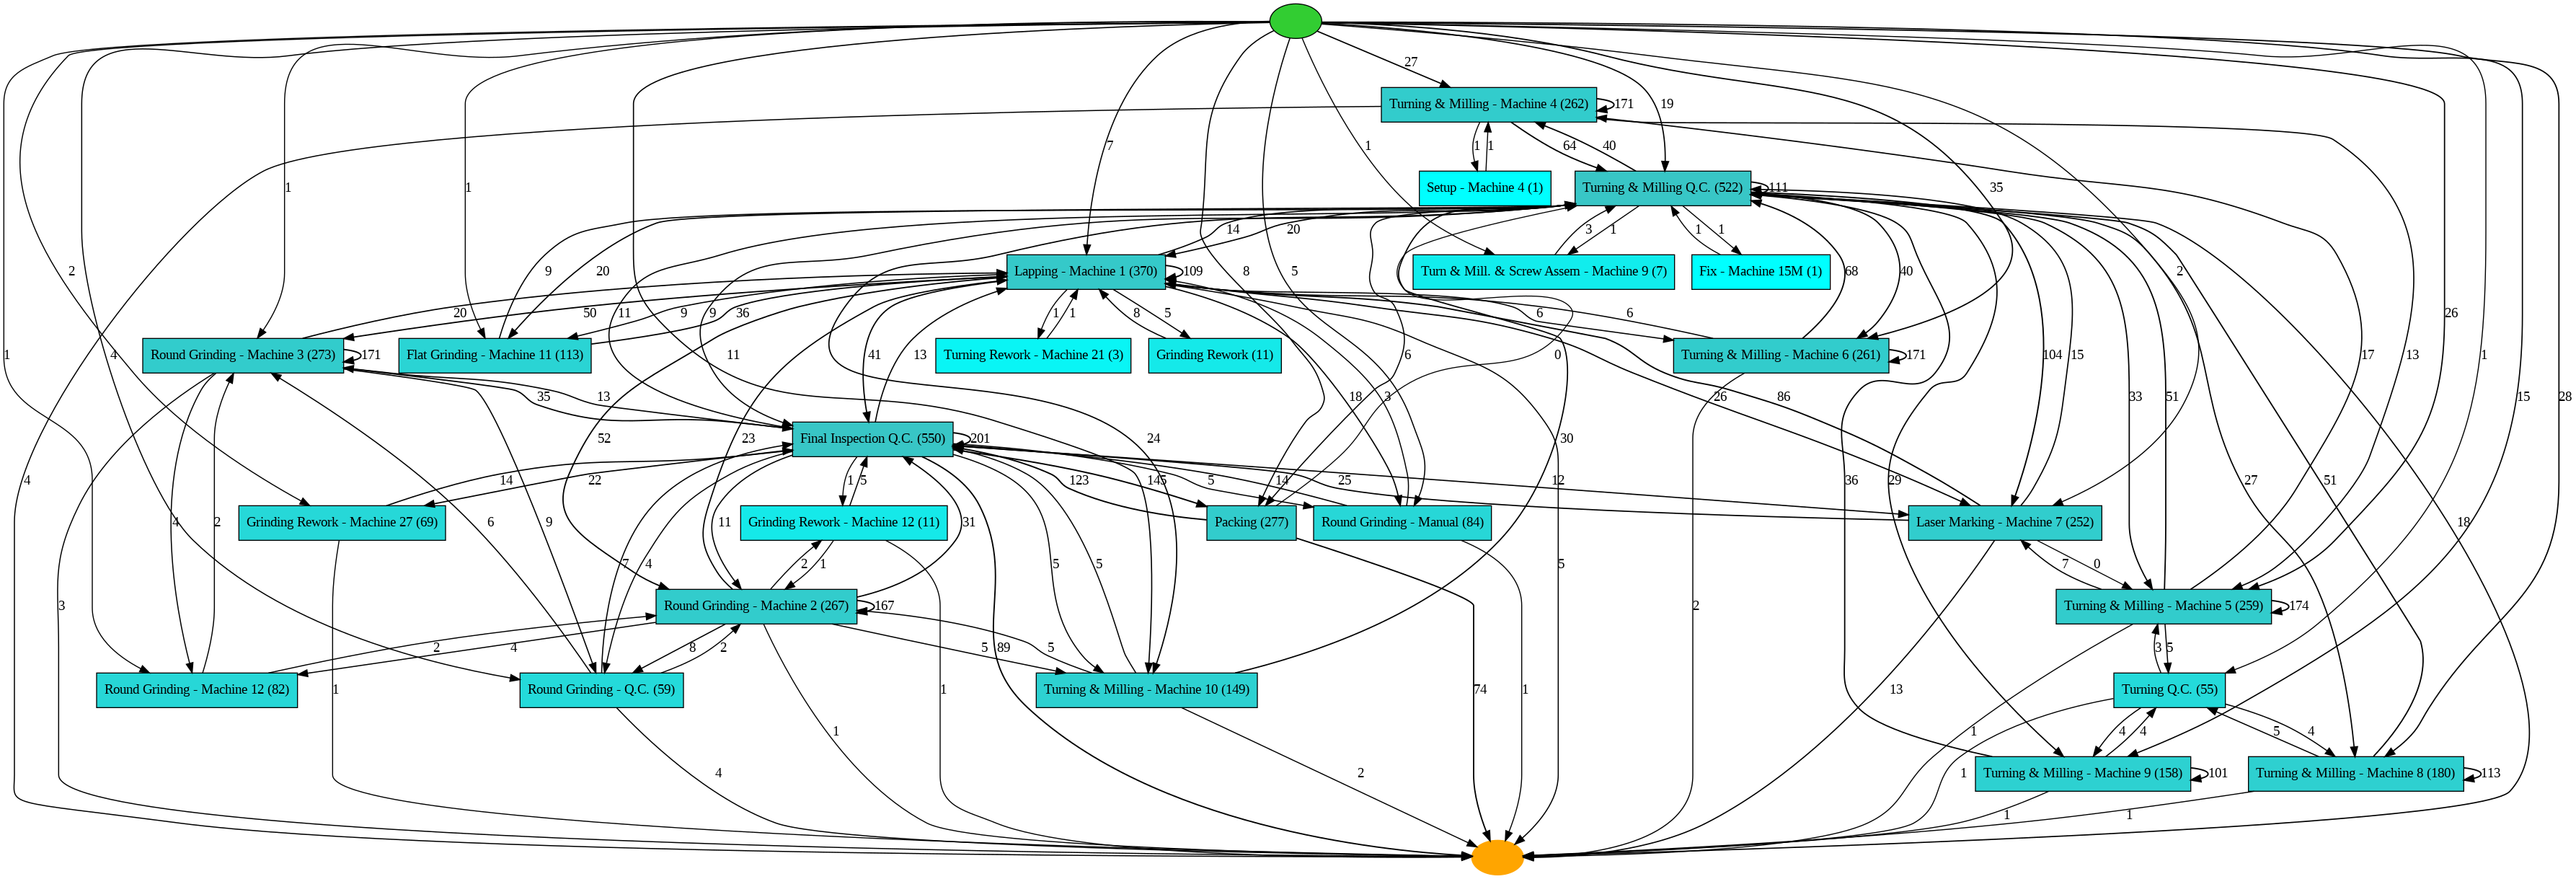

In [ ]:
# Parameter name: Meaning
# dependency_threshold: dependency threshold of the Heuristics Miner (default: 0.5)
# and_threshold: AND measure threshold of the Heuristics Miner (default: 0.65)
# loop_two_threshold: thresholds for the loops of length 2 (default 0.5)

heu_model = pm4py.discover_heuristics_net(event_log,dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_model)

Petri Nets of the Heuristic model

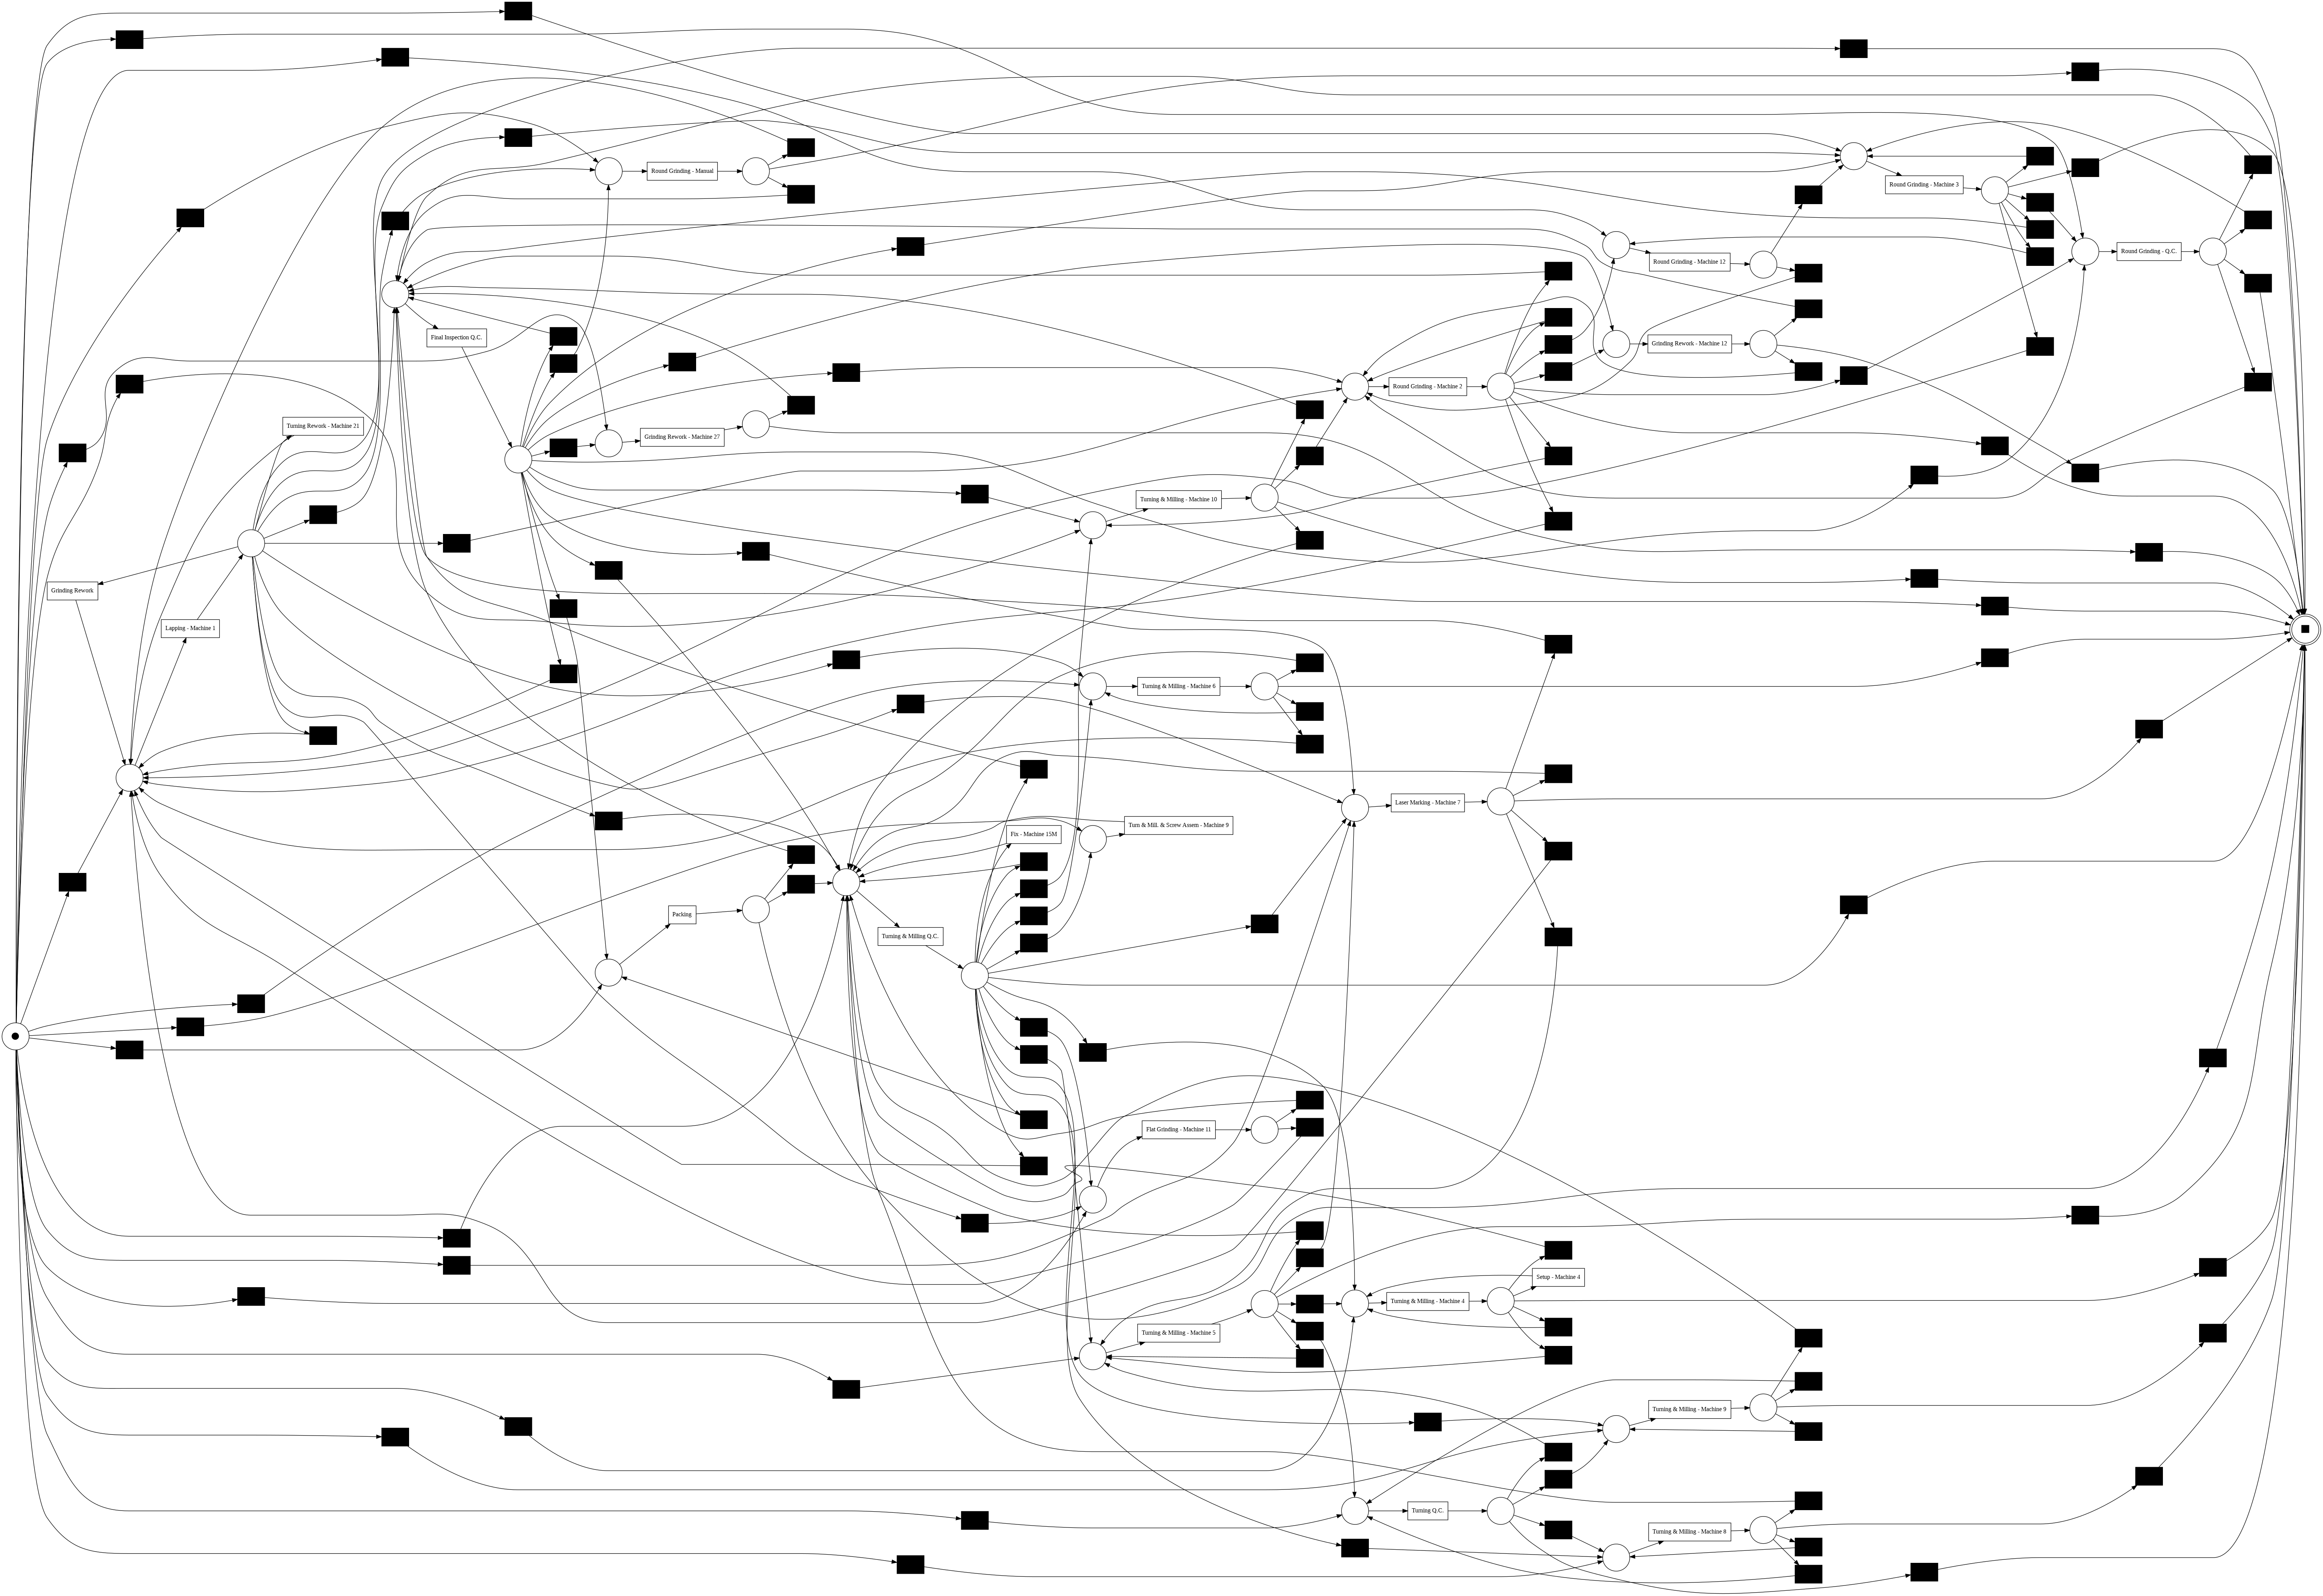

In [ ]:
heu_net, im_heu, fm_heu = pm4py.discover_petri_net_heuristics(event_log, dependency_threshold=0.99)
pm4py.view_petri_net(heu_net, im_heu, fm_heu)

In [ ]:
num_places = len(heu_net.places)
num_transitions = len(heu_net.transitions)

print("Number of places of the Heuristic Net:", num_places)
print("Number of transition of the Heuristic Net:", num_transitions)

Number of places of the Heuristic Net: 43
Number of transition of the Heuristic Net: 148


In [ ]:
# Check soundness
woflan.apply(heu_net, im_heu, fm_heu)

Input is ok.
Petri Net is a workflow net.
Every place is covered by s-components.
There are no dead tasks.
All tasks are live.


True

In [ ]:
# Log-Model Evaluation
print("Fitness token based replay:", pm4py.fitness_token_based_replay(event_log, heu_net, im_heu, fm_heu))
print("Fitness alignments:", pm4py.fitness_alignments(event_log, heu_net, im_heu, fm_heu))
print("Precision token based replay:",pm4py.precision_token_based_replay(event_log, heu_net, im_heu, fm_heu))
print("Precision alignments:",pm4py.precision_alignments(event_log, heu_net, im_heu, fm_heu))
print("Generalization:", generalization_evaluator.apply(event_log, heu_net, im_heu, fm_heu))

replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

Fitness token based replay: {'perc_fit_traces': 24.0, 'average_trace_fitness': 0.9081552802147738, 'log_fitness': 0.9220514052366082, 'percentage_of_fitting_traces': 24.0}


aligning log, completed variants ::   0%|          | 0/221 [00:00<?, ?it/s]

Fitness alignments: {'percFitTraces': 21.333333333333332, 'averageFitness': 0.8004996821605403, 'percentage_of_fitting_traces': 21.333333333333332, 'average_trace_fitness': 0.8004996821605403, 'log_fitness': 0.789142300460671}


replaying log with TBR, completed traces ::   0%|          | 0/3572 [00:00<?, ?it/s]

Precision token based replay: 0.36728279976562084


computing precision with alignments, completed variants ::   0%|          | 0/3572 [00:00<?, ?it/s]

Precision alignments: 0.4283964149848475


replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

Generalization: 0.6560452041352336


The provided results describe conformity assessments between the event log and the Petri net through two different techniques: token-based replay and alignment. Furthermore, the accuracy of the models against the event log is also evaluated with the generalization.

1. **Fitness token based replay**:
    - `perc_fit_traces`: 24% of traces in the event log fit the Petri net.
    - `average_trace_fitness`: On average, traces fit the Petri net 90.8%.
    - `log_fitness`: The overall degree of fit between the event log and the Petri net is 92.2%.
    - `percentage_of_fitting_traces`: This value also indicates that 24% of the traces in the event log fit the Petri net.

2. **Fitness alignments**:
    - `percFitTraces`: 21.33% of traces in the event log fit the Petri net.
    - `averageFitness`: On average, tracks fit 80.1% to the Petri net.
    - `percentage_of_fitting_traces`: 21.33% of traces in the event log fit the Petri net.
    - `average_trace_fitness`: This value also indicates that on average traces are 80.1% fit to the Petri net.
    - `log_fitness`: The overall degree of fit between the event log and the Petri net is 78.9%.

3. **Precision token based replay**:
    - The accuracy of the model compared to the event log, calculated using token-based replay, is 36.7%.

4. **Precision alignments**:
    - The accuracy of the model with respect to the event log, calculated using alignment, is 42.8%.

5. **Generalization**:
    - The generalization of the model with respect to the event log is 65.60%.



### Inductive Miner

*   Can handle invisible tasks
*   Model is sound
*   Most used process mining algorithm

**Advantages**:
*   Guarantees Precision and Fitness
*   Can handle invisible task

**Disadvantages**:
*   It lacks Simplicity and Generalization.
*   Usually make extensive use of hidden transitions (especially for skipping/looping on a portion on the model).

In [ ]:
inductive_net, im_inductive, fm_inductive = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(inductive_net, im_inductive, fm_inductive, format="png")

In [ ]:
num_places = len(inductive_net.places)
num_transitions = len(inductive_net.transitions)

print("Number of places of the Inductive Net:", num_places)
print("Number of transition of the Inductive Net:", num_transitions)

Number of places of the Inductive Net: 136
Number of transition of the Inductive Net: 220


The Petri Net model obtained:
*   is Safeness since every place is 1-bounded.
*   is deadlock-free since does not contain any deadlock.
It is evident that the possible sequences are exhaustive, but there are so many of them that they risk allowing unrealistic situations as well.

In [ ]:
# Check soundness
woflan.apply(inductive_net, im_inductive, fm_inductive)

Input is ok.
Petri Net is a workflow net.
Every place is covered by s-components.
There are no dead tasks.
All tasks are live.


True

In [ ]:
# Log-Model Evaluation
print("Fitness token based replay:", pm4py.fitness_token_based_replay(event_log, inductive_net, im_inductive, fm_inductive))
print("Fitness alignments:", pm4py.fitness_alignments(event_log, heu_net, im_heu, fm_heu))
print("Precision token based replay:",pm4py.precision_token_based_replay(event_log, inductive_net, im_inductive, fm_inductive))
print("Precision alignments:",pm4py.precision_alignments(event_log, heu_net, im_heu, fm_heu))
print("Generalization:", generalization_evaluator.apply(event_log, inductive_net, im_inductive, fm_inductive))

replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

Fitness token based replay: {'perc_fit_traces': 99.55555555555556, 'average_trace_fitness': 0.9998380391670404, 'log_fitness': 0.9998583114770832, 'percentage_of_fitting_traces': 99.55555555555556}


aligning log, completed variants ::   0%|          | 0/221 [00:00<?, ?it/s]

Fitness alignments: {'percFitTraces': 21.333333333333332, 'averageFitness': 0.8004996821605403, 'percentage_of_fitting_traces': 21.333333333333332, 'average_trace_fitness': 0.8004996821605403, 'log_fitness': 0.789142300460671}


replaying log with TBR, completed traces ::   0%|          | 0/3572 [00:00<?, ?it/s]

Precision token based replay: 0.08314506159682855


computing precision with alignments, completed variants ::   0%|          | 0/3572 [00:00<?, ?it/s]

Precision alignments: 0.4283964149848475


replaying log with TBR, completed traces ::   0%|          | 0/221 [00:00<?, ?it/s]

Generalization: 0.6976396347976274


The provided results describe conformity assessments between the event log and the Petri net through two different techniques: token-based replay and alignment. Furthermore, the accuracy of the models against the event log is also evaluated with the generalization.

1. **Fitness token based replay**:
    - `perc_fit_traces`: 99.56% of traces in the event log fit the Petri net.
    - `average_trace_fitness`: On average, traces fit 99.98% to the Petri net.
    - `log_fitness`: The overall degree of fit between the event log and the Petri net is 99.98%.
    - `percentage_of_fitting_traces`: This value also indicates that 99.56% of the traces in the event log fit the Petri net.

2. **Fitness alignments**:
    - `percFitTraces`: 21.33% of traces in the event log fit the Petri net.
    - `averageFitness`: On average, tracks fit 80.04% to the Petri net.
    - `percentage_of_fitting_traces`: 21.33% of traces in the event log fit the Petri net.
    - `average_trace_fitness`: This value also indicates that on average traces fit 80.04% to the Petri net.
    - `log_fitness`: The overall degree of fit between the event log and the Petri net is 78.91%.

3. **Precision token based replay**:
    - The accuracy of the model compared to the event log, calculated using token-based replay, is 8.31%.

4. **Precision alignments**:
    - The accuracy of the model with respect to the event log, calculated using alignment, is 42.83%.

5. **Generalization**:
    - The generalization of the model with respect to the event log is 69.76%.


# Conclusion
The studio case required diverse steps:

1.   Analysis and modeling of data
2.   Process discovery: Alpha Miner, Heuristic Miner, Inductive Miner


From the results of the process discovery we obtain:

1.   **Fitness and Precision**:

*    *Alpha Petri nets*: Has the lowest degree of fitness and accuracy, indicating that the model may not adequately fit the event log.
*    *Heuristic Petri nets*: Shows good performance in both fitness and accuracy, suggesting a good fit between the model and the event log.
*    *Inductive Petri nets*: Achieves the highest degree of fitness, but lowest accuracy, indicating possible overfitting of the model.

2.   **Generalization**:
*    *Alpha Petri nets* has the lowest generalization, which may indicate that the model is unable to effectively adapt to new data.
*    *Heuristic Petri nets* and Inductive Pet show better generalization, which suggests that they are more adaptable and could work well even with previously unseen data.

3.    **Techniques**: the results were evaluated using two different techniques: token-based replay and alignment. It is important to note how performance can vary depending on the technique used.

4.    **Model Complexity**: the Inductive Pet model appears to be the most complex, with better fitness results, but lower accuracy. This may indicate that the model is better able to capture the complexity of the data, but may be more prone to overfitting.

The conclusion of this case of study:
1. **Improved Operational Efficiency**: By applying formal methods and process mining techniques, companies can gain insights into their business processes, identify inefficiencies, and optimize their operations for increased efficiency and cost-effectiveness.

2. **Enhanced Process Understanding**: Through the analysis of business activity logs and the extraction of detailed process models, organizations can gain a better understanding of how their processes actually operate, leading to informed decision-making and process improvements.

3. **Identification of Process Deviations**: Process mining allows for the identification of discrepancies between planned processes and actual executions, enabling organizations to pinpoint deviations, non-conformities, and root causes of inefficiencies for corrective actions.

4. **Continuous Process Improvement**: The use of process mining tools and formal methods facilitates continuous process improvement by providing a data-driven approach to identifying areas for enhancement, implementing changes, and evaluating the impact of process optimizations.

5. **Soundness Verification**: The ability to automatically verify the soundness of obtained models using techniques like Petri Nets ensures that the models are well-formed, free from deadlocks and live-locks, and can reach the final marking consistently, enhancing the reliability of the analysis results.

6. **Process Optimization Opportunities**: By leveraging process mining algorithms and heuristics, organizations can uncover optimization opportunities, streamline workflows, and enhance service quality by addressing inefficiencies and bottlenecks in their processes.
